# Matrix Decomposition

In [1]:
%load_ext autoreload
%autoreload 2
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
from scipy import signal
from spectrogramtools import *
from collections import OrderedDict

In [2]:
A = np.array([[1], [2], [5]])
print(A)
B = np.array([[1, 0, 0, 2, 0, 0, 3, 0, 0, 1]])
print("\n\n")
print(B)

[[1]
 [2]
 [5]]



[[1 0 0 2 0 0 3 0 0 1]]


In [7]:
print(A.dot(B))

[[ 1  0  0  2  0  0  3  0  0  1]
 [ 2  0  0  4  0  0  6  0  0  2]
 [ 5  0  0 10  0  0 15  0  0  5]]


In [3]:
y_voice, sr = librosa.load("princevoice.wav", sr=22050)
ipd.Audio(y_voice, rate=sr)

In [6]:
y_drum, sr = librosa.load("princedrum.wav", sr=22050)
ipd.Audio(y_drum, rate=sr)

In [7]:
win_length = 2048*3
hop_length = 512
SVoice = STFT(y_voice, win_length, hop_length, useLibrosa=False)
SVoice = SVoice[:, 0]
SVoice = np.reshape(SVoice, (SVoice.size, 1))
SDrum = STFT(y_drum, win_length, hop_length, useLibrosa=False)
SDrum = SDrum[:, 0]
SDrum = np.reshape(SDrum, (SDrum.size, 1))

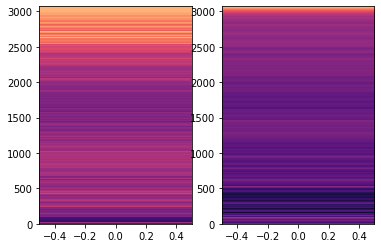

In [16]:
plt.subplot(121)
plt.imshow(np.log(np.abs(SDrum)/1e-3), aspect='auto', cmap='magma_r')
plt.gca().invert_yaxis()
plt.subplot(122)
plt.imshow(np.log(np.abs(SVoice)/1e-3), aspect='auto', cmap='magma_r')
plt.gca().invert_yaxis()

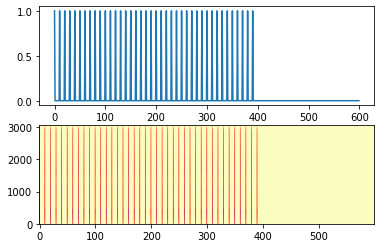

In [8]:
H = np.zeros((1, 600))
N = 40
T = 10
H[0, 0:N*T:T] = 1#/(1+np.arange(N))
S = SVoice.dot(H)
y = iSTFT(S, win_length, hop_length)

plt.subplot(211)
plt.plot(H[0, :])
plt.subplot(212)
plt.imshow(np.log(1 + np.abs(S)/1e-3), aspect='auto', cmap='magma_r')
plt.gca().invert_yaxis()

ipd.Audio(y, rate=sr)

In [47]:
H = np.zeros((1, 500))
H[0, 0::20] = 1
V = SDrum.dot(H)
y = iSTFT(V, win_length, hop_length)
ipd.Audio(y, rate=sr)

## TODO: Make a 4 on 3 Rhythm

In [9]:
H = np.zeros((1, 500))
H[0, 0::20] = 1
H[0, 0::15] = 1
V = SVoice.dot(H)
y = iSTFT(V, win_length, hop_length)
ipd.Audio(y, rate=sr)

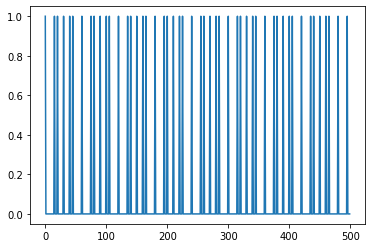

In [38]:
plt.plot(H[0, :])

## TODO: Make a 3 on 2 Rhythm
Where the 3 is voice and the 2 is drum